In [21]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [22]:
df = pd.read_csv('Validation error of 87 images')
df.head()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
0,0,-23.461839,21.970888,-0.490080,-7.292618,-11.059213,16.335258,-49.052537,2.277600e+27,1333.333343,...,-18.420681,-5.884384,-18.420681,1.743233e+27,1626.278520,-16.548282,9.721899e+07,-16.383498,-6.845613,-9.384869
1,0,2.161181,19.418036,10.249205,-1.950845,-3.601389,-0.927051,46.771314,3.796000e+27,1444.444448,...,-14.838882,-14.838882,-7.675284,3.878038e+27,1724.927187,-18.334202,9.215783e+07,-14.304476,-14.701318,-11.265115
2,0,10.326344,-16.177018,-9.976753,3.221688,20.773897,87.796485,-46.832688,2.783733e+27,1888.888896,...,-13.047982,-2.302585,-14.838882,3.071191e+27,1583.323002,-14.970669,7.456876e+07,-15.758556,-4.324174,-7.889435
3,0,6.206040,7.950566,0.104584,-6.849477,23.971840,30.189913,4.784447,2.024533e+27,1555.555582,...,-9.466183,-4.093484,-14.838882,2.150177e+27,1679.231048,-18.439946,9.261861e+07,-11.735402,-5.329304,-15.548840
4,0,16.728936,22.988022,1.037089,-1.742953,5.118172,16.204275,-89.738901,2.024533e+27,1222.222224,...,-14.838882,-7.675284,-4.093484,2.363216e+27,1503.186941,-16.802247,9.769598e+07,-15.598361,-8.919008,-0.420036


In [23]:
df.describe()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
count,87.0,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,8.700000e+01,87.000000,...,87.000000,87.000000,87.000000,8.700000e+01,87.000000,87.000000,8.700000e+01,87.000000,87.000000,87.000000
mean,0.0,12.618754,5.453618,20.586411,-1.024678,10.258898,12.984719,30.043828,2.757554e+27,1515.964249,...,-10.824797,-10.701286,-10.845382,2.992249e+27,1521.475470,-11.304506,7.926869e+07,-11.362027,-11.244755,-12.103736
std,0.0,33.395516,31.216953,36.962759,4.349631,25.377629,26.269757,90.912439,6.695898e+26,331.596257,...,5.231782,5.008493,5.158094,7.559544e+26,265.623895,4.914115,1.460535e+07,5.078482,4.378667,5.370970
min,0.0,-56.171092,-48.983220,-20.435488,-13.449788,-36.941733,-29.096390,-243.664289,1.518400e+27,1000.000000,...,-18.420681,-18.420681,-18.420681,1.513453e+27,1007.294905,-18.534077,5.564059e+07,-18.432263,-18.420544,-18.447857
25%,0.0,-6.606356,-16.303326,0.022528,-3.800440,-4.947588,-1.372027,-19.800881,2.277600e+27,1222.222224,...,-14.838882,-14.838882,-14.838882,2.574697e+27,1335.756630,-15.077384,6.646978e+07,-15.975767,-14.773625,-16.669024
50%,0.0,6.899441,-1.637416,5.468596,-0.515325,5.801206,5.024783,10.609822,2.783733e+27,1555.555582,...,-9.466183,-11.257083,-11.257083,3.028580e+27,1546.690941,-11.387216,7.785615e+07,-11.625330,-11.844420,-13.314597
75%,0.0,26.787579,21.232953,22.449742,1.154900,23.614074,16.697500,41.450385,3.289867e+27,1777.777791,...,-5.884384,-5.884384,-5.884384,3.568787e+27,1725.113451,-6.750070,9.361053e+07,-6.346840,-7.482705,-8.061468
max,0.0,104.452754,87.185729,166.980207,9.170908,93.951391,123.379660,332.571297,3.796000e+27,2000.000000,...,-2.302585,-2.302585,-2.302585,4.359132e+27,1995.946884,-2.612595,1.026283e+08,-2.439341,-2.520070,3.307992


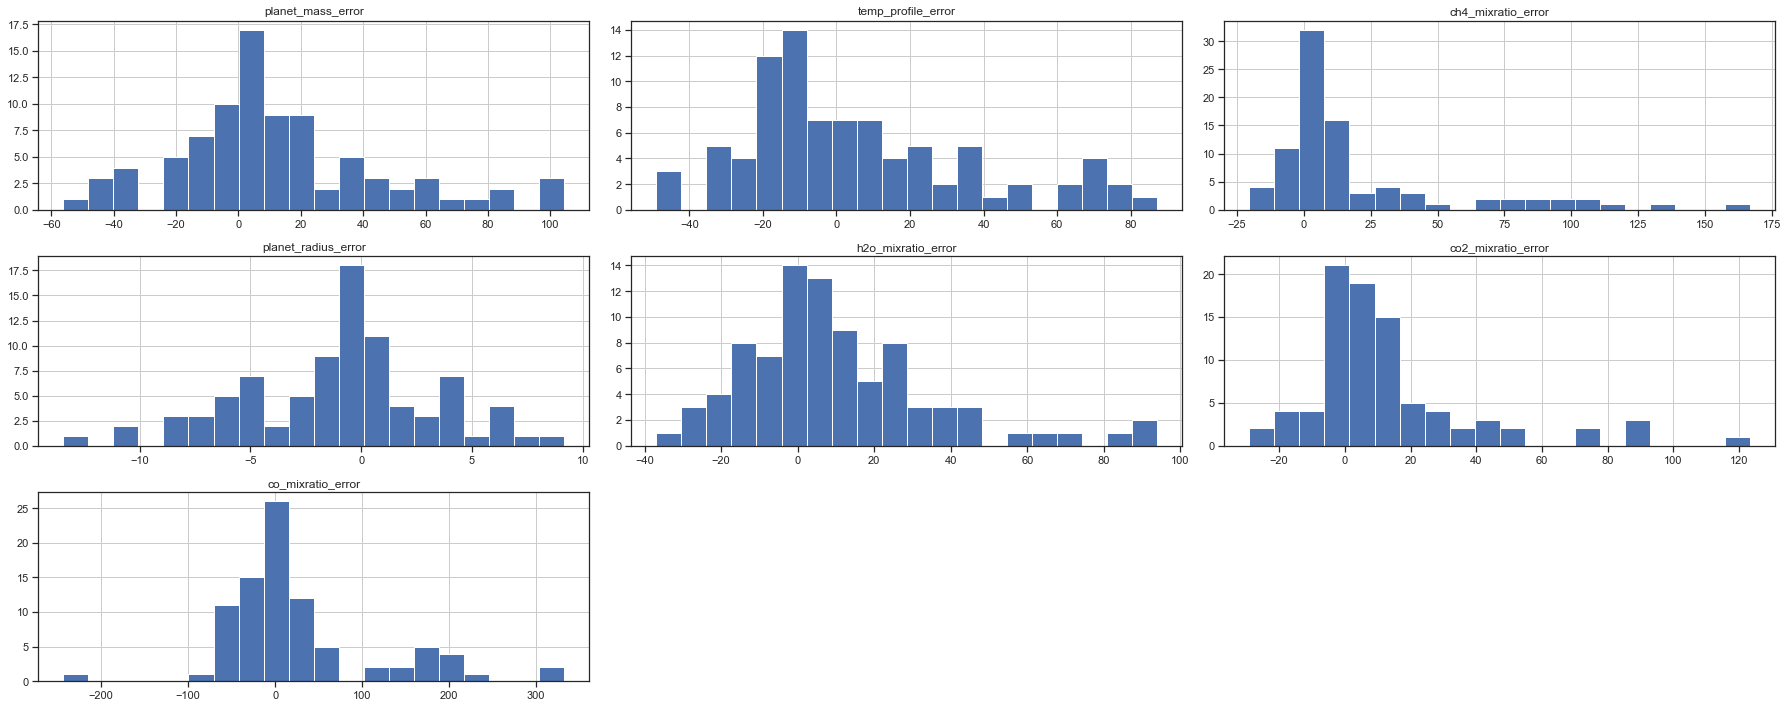

In [24]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param+'_error')
    plt.hist(df[param+'_error'], bins=20)
    plt.grid()
    plt.tight_layout()

# Grab the $n$ sigma errors

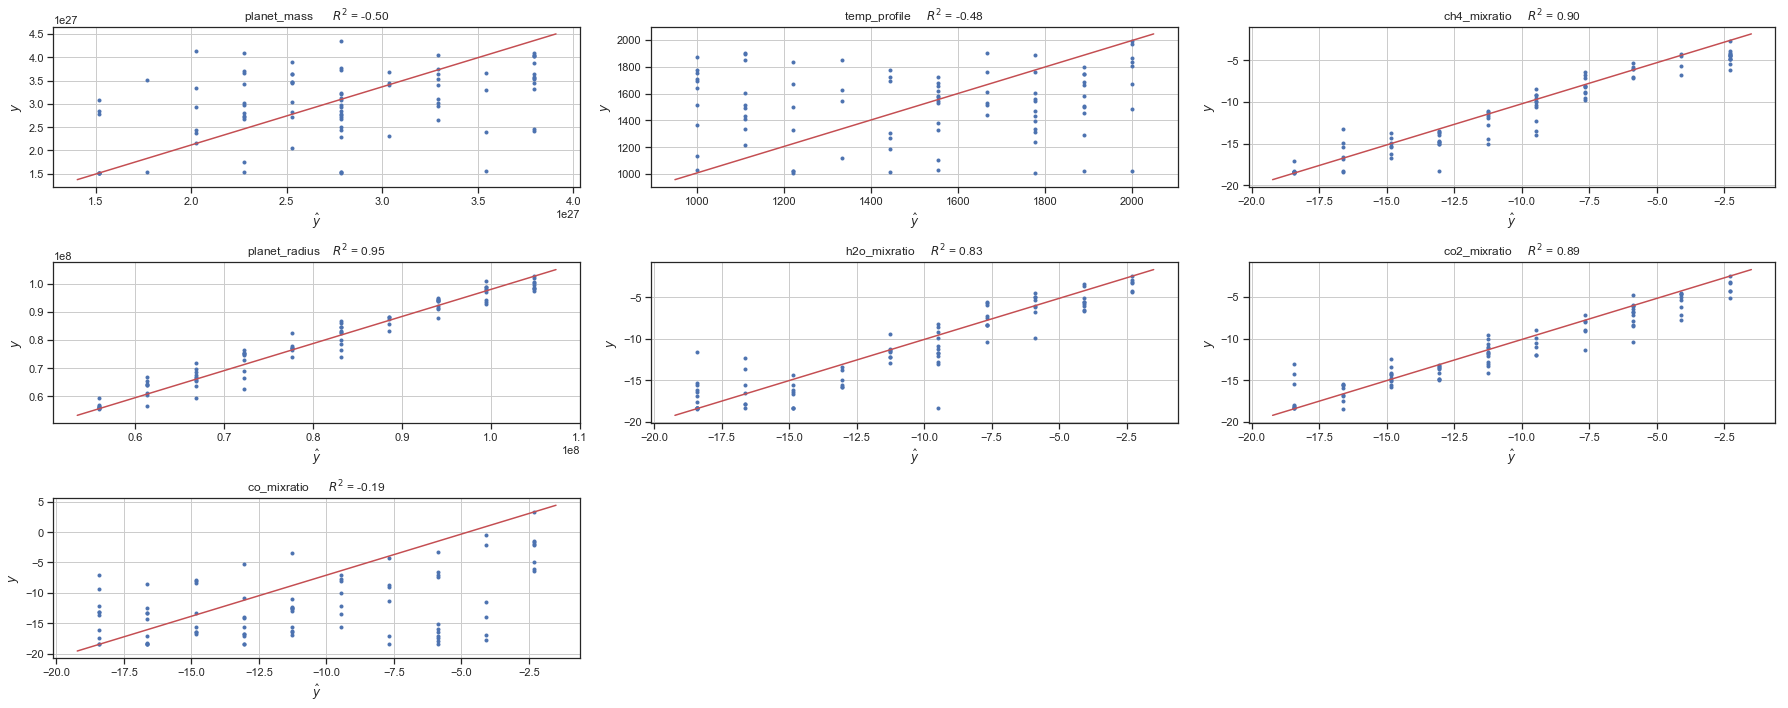

In [25]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    y_hat = df[param+'_real']
    y = df[param+'_inpainted']
    
    r2 = r2_score(y_hat, y)
    
    plt.subplot(3,3,i+1)

    plt.title(param +' \t $R^2$ = %.2f' % r2)
    plt.plot(y_hat, y, '.')
    #plt.ylim(plt.xlim()) # set y axis range the same as x axis range
    plt.plot(plt.xlim(), plt.ylim(), ls="-", c='r')
    
    plt.xlabel(r"$\hat{y}$")
    plt.ylabel(r"$y$")
    plt.grid()
    plt.tight_layout()

In [26]:
# Error per parameter

In [27]:
params

['planet_mass',
 'temp_profile',
 'ch4_mixratio',
 'planet_radius',
 'h2o_mixratio',
 'co2_mixratio',
 'co_mixratio']

In [28]:
param = params[6]
print('Param: ', param)

uniques = df[param+'_real'].unique()
print('Uniques: ',uniques)

Param:  co_mixratio
Uniques:  [-18.42068074  -7.67528397 -14.8388818   -4.09348434  -5.88438368
 -16.62978126 -13.04798199 -11.25708265  -9.46618331  -2.302585  ]


10 20.526431338481935
6 70.6097528539051
8 27.301943183388175
6 182.56037585263894
11 95.64234271142259
10 20.39498244843643
10 31.100603962972553
11 33.262746864971916
7 34.30248487925895
8 137.90116966689936


Text(0, 0.5, 'stds')

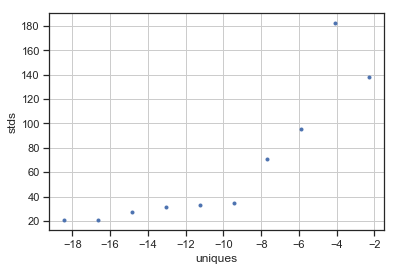

In [29]:
counts = []
stds = []
for unique in uniques:
    t = df[param+'_error'][(df[param+'_real'] == unique)]
    std = t.std()
    count = t.count()
    print(count, std)
    
    counts.append(count)
    stds.append(std)
    
plt.plot(uniques, stds, '.')
plt.grid()
plt.xlabel('uniques')
plt.ylabel('stds')

In [30]:
params

['planet_mass',
 'temp_profile',
 'ch4_mixratio',
 'planet_radius',
 'h2o_mixratio',
 'co2_mixratio',
 'co_mixratio']